In [52]:
#Lloyd algorithm
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [53]:
#Generate sample data
X, _ = make_blobs(n_samples=100, centers=3, random_state=42)

In [54]:
#Utility function
def find_clusters(point, clusters):
  for i , cluster in enumerate(clusters):
    if point in cluster:
      return i

  return -1

In [55]:
def cost_function(data, clusters):
  cost = 0
  for cluster in clusters:
    if len(cluster) > 0:
      centroid = np.mean(data[cluster], axis=0)
      cost += np.sum(np.square(data[cluster] - centroid)**2)

  return cost


In [56]:
def move_point(point,from_cluster, to_cluster):
  from_cluster.remove(point)
  to_cluster.append(point)


In [57]:
"""def conservative_clustering(data, clusters):
  cuurent_cost = cost_function(data,clusters)
  while True:
    improved = False
    for i in range(len(data)):
      cuurent_cluster_idx = dind_cluster(i, clusters)
      for j in range(len(clusters)):
        if j != cuurent_cluster_idx:
          new_clusters = [cluster[:] for cluster in clusters]
          if i in new_clusters[cuurent_cluster_idx]:
            new_clusters[j].append(i)
            new_cost = cost_function(data, new_clusters)
            if new_cost < current_cost:
              current_cost = new_cost
              move_point(i, new_clusters[cuurent_cluster_idx], new_clusters[j])
              improved = True
    if not improved:
      break
  return clusters"""

'def conservative_clustering(data, clusters):\n  cuurent_cost = cost_function(data,clusters)\n  while True:\n    improved = False\n    for i in range(len(data)):\n      cuurent_cluster_idx = dind_cluster(i, clusters)\n      for j in range(len(clusters)):\n        if j != cuurent_cluster_idx:\n          new_clusters = [cluster[:] for cluster in clusters]\n          if i in new_clusters[cuurent_cluster_idx]:\n            new_clusters[j].append(i)\n            new_cost = cost_function(data, new_clusters)\n            if new_cost < current_cost:\n              current_cost = new_cost\n              move_point(i, new_clusters[cuurent_cluster_idx], new_clusters[j])\n              improved = True\n    if not improved:\n      break\n  return clusters'

In [58]:
#Initial clustering
"""k = 3
clusters = [[] for _ in range(k)]
for i in range(len(X)):
  clusters[i % k].append(i)"""

'k = 3\nclusters = [[] for _ in range(k)]\nfor i in range(len(X)):\n  clusters[i % k].append(i)'

In [59]:
def cost_function(data, clusters):
  cost = 0
  for cluster in clusters:
    if len(cluster) > 0:
      centroid = np.mean(data[cluster], axis=0)
      cost += np.sum(np.square(data[cluster] - centroid)**2)

  return cost

def move_point(point,from_cluster, to_cluster):
  from_cluster.remove(point)
  to_cluster.append(point)

def find_cluster(point, clusters): # New function to find the cluster index
    for idx, cluster in enumerate(clusters):
        if point in cluster:
            return idx
    return None

def conservative_clustering(data, clusters):
  current_cost = cost_function(data,clusters) # Fixed typo 'cuurent_cost'
  while True:
    improved = False
    for i in range(len(data)):
      current_cluster_idx = find_cluster(i, clusters) # Use the new function
      for j in range(len(clusters)):
        if j != current_cluster_idx:
          new_clusters = [cluster[:] for cluster in clusters]
          if i in new_clusters[current_cluster_idx]:
            new_clusters[j].append(i)
            new_cost = cost_function(data, new_clusters)
            if new_cost < current_cost:
              current_cost = new_cost
              move_point(i, new_clusters[current_cluster_idx], new_clusters[j])
              improved = True
    if not improved:
      break
  return clusters

#Initial clustering
k = 3
clusters = [[] for _ in range(k)]
for i in range(len(X)):
  clusters[i % k].append(i)

#Apply conservative clustering
clusters = conservative_clustering(X, clusters)

In [60]:
#Initial clustering
k = 3
clusters = [[] for _ in range(k)]
for i in range(len(X)):
  clusters[i % k].append(i)

In [61]:
#Apply conservative clustering
clusters = conservative_clustering(X, clusters)


<function matplotlib.pyplot.show(close=None, block=None)>

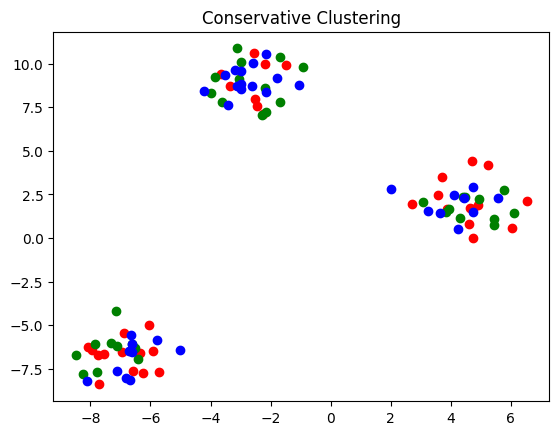

In [62]:
#Plot the graph
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
  points = X[cluster]
  plt.scatter(points[:, 0], points[:, 1], color=colors[i])
plt.title('Conservative Clustering')
plt.show

In [63]:
#Mixture of gaussian
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

In [64]:
#Generate synthethic data
X, y = make_blobs(n_samples=300, centers=4,cluster_std = 0.60, random_state=42)

In [65]:
#Apply Gaussian Mixture model
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

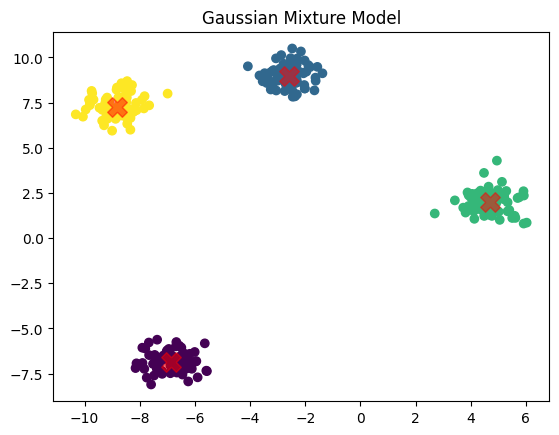

In [66]:
#Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.title('Gaussian Mixture Model')
plt.show()

In [67]:
#k-Medoids
import numpy as np
from sklearn.metrics import pairwise_distances
import random

In [68]:
def k_medoids(X, k, max_iter=300):
  m,n = X.shape
  medoids = random.sample(range(m), k)
  medoids_old = []
  labels = np.zeros(m)

In [69]:
def assign_labels(X, medoids):
  dist_matrix = pairwise_distances(X, X[medoids], metric = 'euclidean')
  return np.argmin(dist_matrix, axis=1)


In [70]:
def update_medoids(X, labels, k):
  new_medoids = np.zeroes(k, dtype=int)
  for i in range(k):
    cluster_points = X[labels == i]
    if len(cluster_points) == 0:
      new_medoids[i] = random.choice(range(X.shape[0]))
    else:
      dist_matrix = pairwise_distances(cluster_points, cluster_points[new_medoids], metric='euclidean')
      medoid_idx = np.argmin(np.sum(dist_matrix, axis=1))
      new_medoids[i] = np.where(labels == i)[0][medoid_idx]
  return new_medoids

In [75]:
for iteration in range(max_iter):
  labels = assign_labels(X,medoids)
  medoids_pld = medoids
  medoids = update_medoids(X,labels,k)
  if np.all(medoids==medoids_old):
    break

return medoids, labels

NameError: name 'max_iter' is not defined